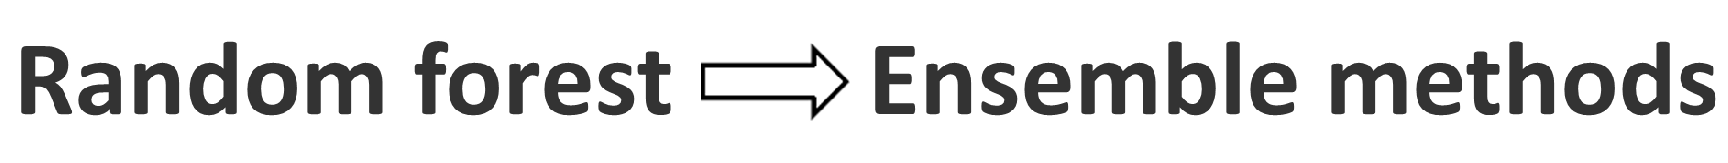

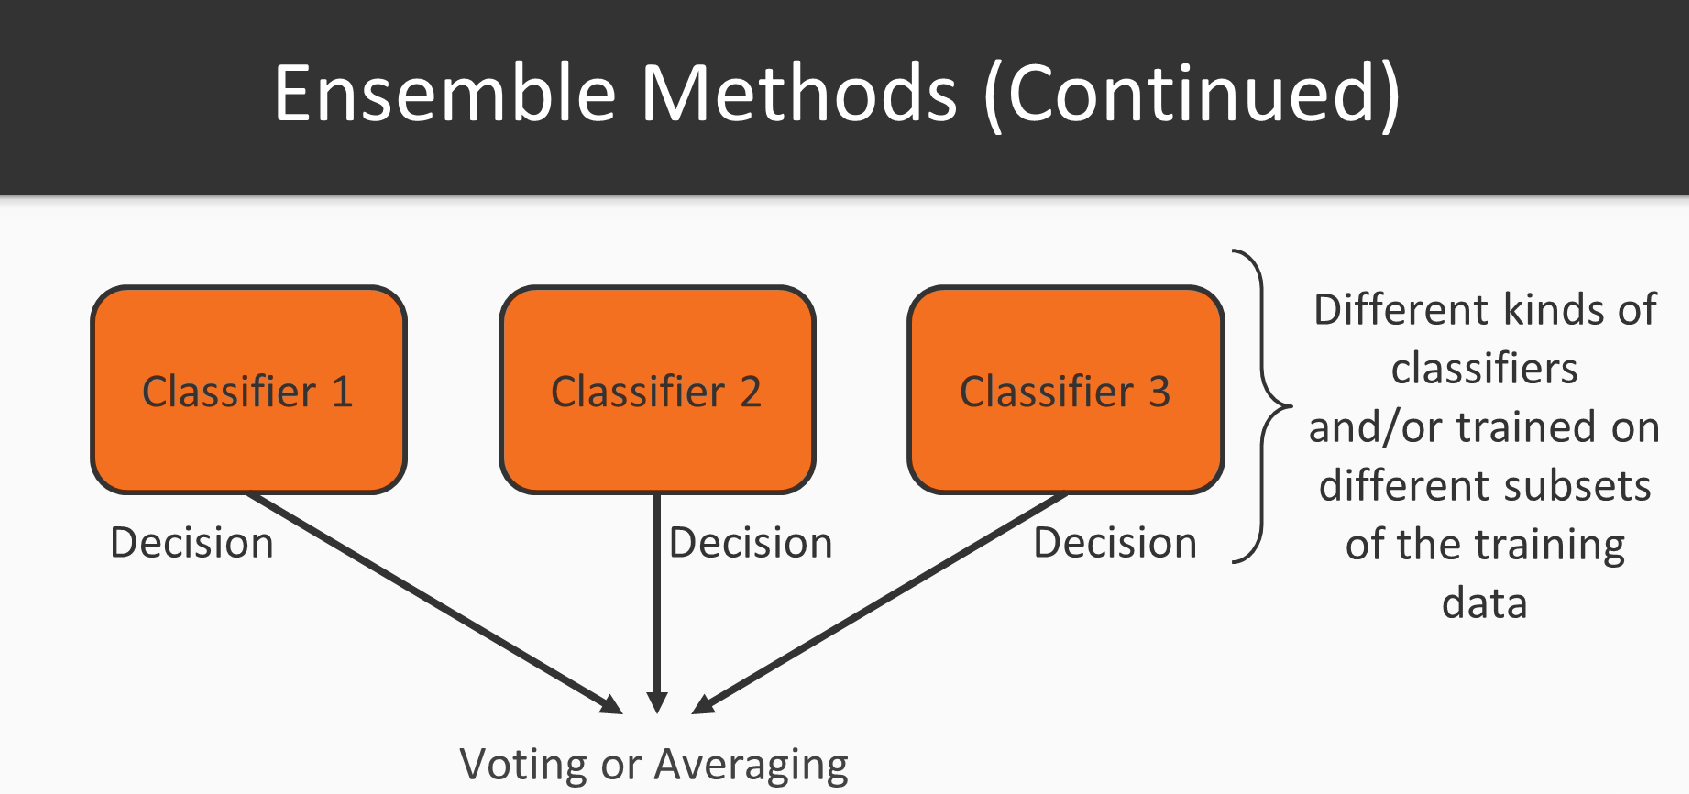

## Random Forest - An Ensemble of Decision Trees

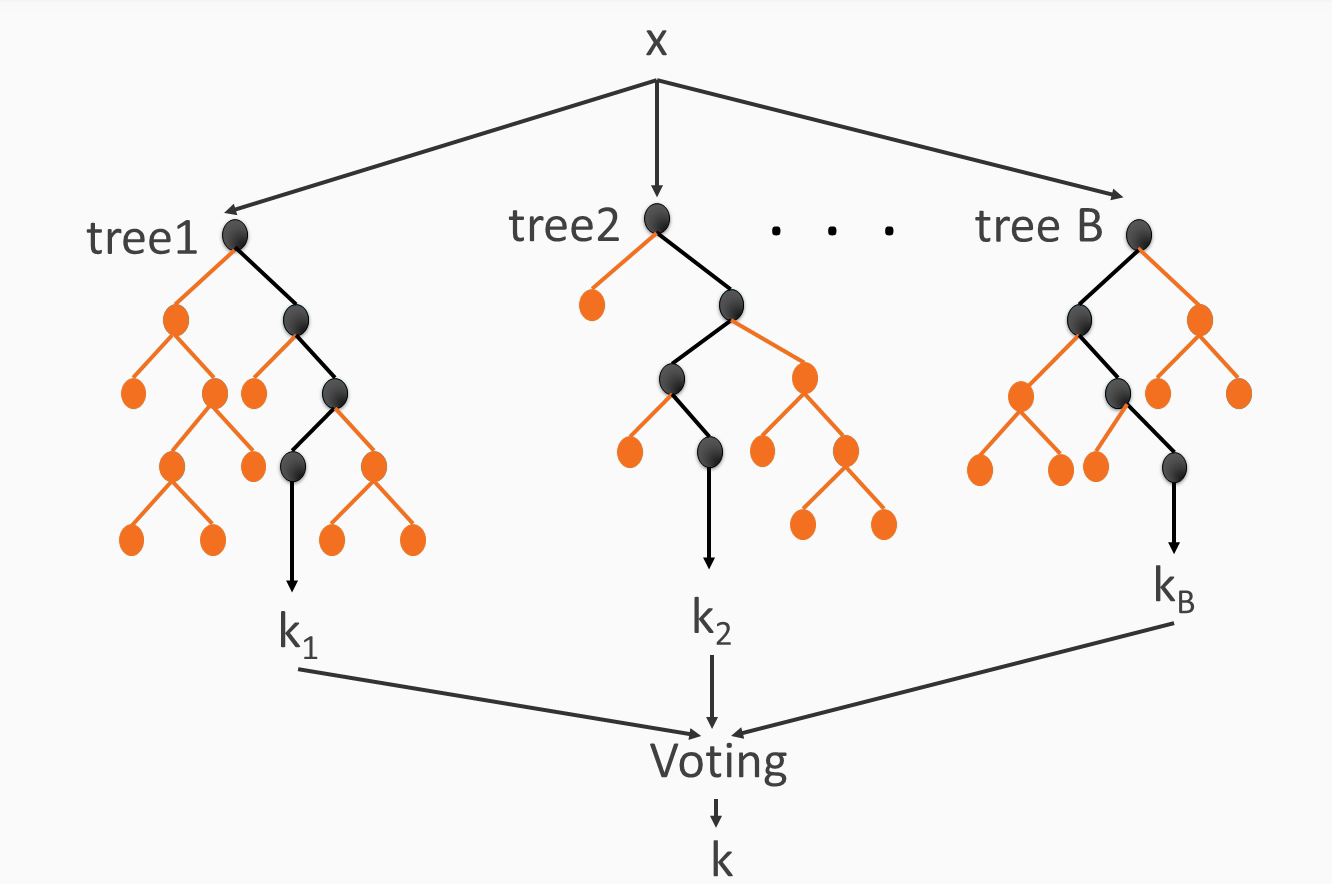

## When to use Random Forest?

|**Do**|**Don't**|
|------|---------|
|Your dataset has lots of attributes and rows| Your dataset has few attributes or rows|
|Interpretability is not important| Interpretability is paramount|
|Accuracy is paramount| You have limited memory during prediction (models can be large)|

# Predicting Bird Species with Random Forests

 We are going to use following dataset: http://www.vision.caltech.edu/datasets/cub_200_2011/
        
**Details**

Caltech-UCSD Birds-200-2011 (CUB-200-2011) is an extended version of the CUB-200 dataset, with roughly double the number of images per class and new part location annotations.

* Number of categories: 200
* Number of images: 11,788
* Annotations per image: 15 Part Locations, 312 Binary Attributes, 1 Bounding Box

For detailed information about the dataset, please see the above URL link.

In [1]:
import pandas as pd

#some lines have too many fields (?), so skip bad lines
imgatt = pd.read_csv("D:/Data/Prediction Model/Predict Bird Species/CUB_200_2011/attributes/image_attribute_labels.txt", 
                     sep='\s+', header=None, error_bad_lines=False, warn_bad_lines=False,
                     usecols=[0,1,2], names=['imgid', 'attid', 'present'])



C:\Users\sshas\AppData\Local\Temp\ipykernel_10000\2450089612.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  imgatt = pd.read_csv("D:/Data/Prediction Model/Predict Bird Species/CUB_200_2011/attributes/image_attribute_labels.txt",
C:\Users\sshas\AppData\Local\Temp\ipykernel_10000\2450089612.py:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  imgatt = pd.read_csv("D:/Data/Prediction Model/Predict Bird Species/CUB_200_2011/attributes/image_attribute_labels.txt",


In [2]:
imgatt.head()

,imgid,attid,present
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,1


In [3]:
imgatt.shape

(3677856, 3)

In [4]:
# need to recognize imgatt to have one row per imgid, and 312 columns (one column per attribute),
# with 1/0in each cell respectively if that imgid has that attribute or not

imgatt2 = imgatt.pivot(index='imgid', columns='attid', values='present')

In [5]:
imgatt2.head()

attid,1,2,3,4,5,6,7,8,9,10,...,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
imgatt2.shape

(11788, 312)

In [7]:
# now we need to load the image true classes

imglabels = pd.read_csv("D:/Data/Prediction Model/Predict Bird Species/CUB_200_2011/image_class_labels.txt",
                       sep = ' ', header=None, names=['imgid', 'label'])

imglabels = imglabels.set_index('imgid')

In [8]:
imglabels.head()

,label
imgid,
1,1
2,1
3,1
4,1
5,1


In [9]:
imglabels.shape

(11788, 1)

In [10]:
# now we need to attach the labels to the attribute data set,
# and shuffle; then we will separate a test set from a training set

df = imgatt2.join(imglabels)
df = df.sample(frac=1)

In [11]:
df_att = df.iloc[:, :312]
df_label = df.iloc[:, 312:]

In [12]:
df_att.head()

,1,2,3,4,5,6,7,8,9,10,...,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,
8498,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8398,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
5205,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
10358,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3884,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
df_label.head()

,label
imgid,
8498,145
8398,143
5205,89
10358,176
3884,67


In [14]:
df_train_att = df_att[:8000]
df_train_label = df_label[:8000]
df_test_att = df_att[8000:]
df_test_label = df_label[8000:]

df_train_label = df_train_label['label']
df_test_label = df_test_label['label']

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=50, random_state=0, n_estimators=100)

In [16]:
clf.fit(df_train_att, df_train_label)

RandomForestClassifier(max_features=50, random_state=0)

In [17]:
print(clf.predict(df_train_att.head()))

[145 143  89 176  67]


In [18]:
clf.score(df_test_att, df_test_label)

0.4567053854276663

In [19]:
from sklearn.metrics import confusion_matrix
pred_labels = clf.predict(df_test_att)
cm = confusion_matrix(df_test_label, pred_labels)

In [20]:
cm

array([[ 5,  0,  2, ...,  0,  1,  0],
       [ 1,  9,  0, ...,  0,  1,  0],
       [ 0,  0,  6, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  3,  0,  0],
       [ 0,  0,  0, ...,  0,  5,  0],
       [ 0,  0,  0, ...,  0,  0, 23]], dtype=int64)

In [21]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                         nomalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    
    plt.imshow(cm, interploation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    
    #for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #    plt.text(j, i, format(cm[i, j], fmt),
    #            horizontaLalignment="center",
    #            color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

In [22]:
birds = pd.read_csv("D:/Data/Prediction Model/Predict Bird Species/CUB_200_2011/classes.txt",
                   sep='\s+', header=None, usecols=[1], names=['birdname'])

birds = birds['birdname']
birds

0      001.Black_footed_Albatross
1            002.Laysan_Albatross
2             003.Sooty_Albatross
3           004.Groove_billed_Ani
4              005.Crested_Auklet
                  ...            
195                196.House_Wren
196                197.Marsh_Wren
197                 198.Rock_Wren
198               199.Winter_Wren
199       200.Common_Yellowthroat
Name: birdname, Length: 200, dtype: object

In [23]:
from sklearn import tree, svm
clftree = tree.DecisionTreeClassifier()
clftree.fit(df_train_att, df_train_label)
clftree.score(df_test_att, df_test_label)

0.27824709609292503

In [24]:
clfsvm = svm.SVC()
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.4944561774023231

In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)

#show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.44 (+/- 0.02)


In [26]:
scorestree = cross_val_score(clftree, df_train_att, df_train_label, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scorestree.mean(), scorestree.std() * 2))

Accuracy: 0.26 (+/- 0.01)


In [27]:
scoressvm = cross_val_score(clfsvm, df_train_att, df_train_label, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scoressvm.mean(), scoressvm.std() * 2))

Accuracy: 0.47 (+/- 0.02)


In [30]:
max_features_opts = range(5, 50, 5)
n_estimators_opts = range(10, 200, 20)
rf_params = np.empty((len(max_features_opts)*len(n_estimators_opts),4) , float)
i = 0
for max_features in max_features_opts:
    for n_estimators in n_estimators_opts:
        clf = RandomForestClassifier(max_features= max_features, n_estimators=n_estimators)
        scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
        rf_params[i,0] = max_features
        rf_params[i,1] = n_estimators
        rf_params[i,2] = scores.mean()
        rf_params[i,3] = scores.std() * 2
        i += 1
        print("Max features: %d, num estimators: %d, accuracy: %0.2f (+/- %0.2f)" % \
             (max_features, n_estimators, scores.mean(), scores.std() * 2))

<IPython.core.display.Javascript object>

Max features: 5, num estimators: 10, accuracy: 0.26 (+/- 0.02)
Max features: 5, num estimators: 30, accuracy: 0.35 (+/- 0.01)
Max features: 5, num estimators: 50, accuracy: 0.39 (+/- 0.01)
Max features: 5, num estimators: 70, accuracy: 0.40 (+/- 0.02)
Max features: 5, num estimators: 90, accuracy: 0.42 (+/- 0.01)
Max features: 5, num estimators: 110, accuracy: 0.42 (+/- 0.01)
Max features: 5, num estimators: 130, accuracy: 0.43 (+/- 0.02)
Max features: 5, num estimators: 150, accuracy: 0.44 (+/- 0.01)
Max features: 5, num estimators: 170, accuracy: 0.44 (+/- 0.01)
Max features: 5, num estimators: 190, accuracy: 0.44 (+/- 0.01)
Max features: 10, num estimators: 10, accuracy: 0.29 (+/- 0.01)
Max features: 10, num estimators: 30, accuracy: 0.38 (+/- 0.00)
Max features: 10, num estimators: 50, accuracy: 0.41 (+/- 0.02)
Max features: 10, num estimators: 70, accuracy: 0.42 (+/- 0.01)
Max features: 10, num estimators: 90, accuracy: 0.43 (+/- 0.02)
Max features: 10, num estimators: 110, accura

C:\Users\sshas\AppData\Local\Temp\ipykernel_10000\1581002703.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


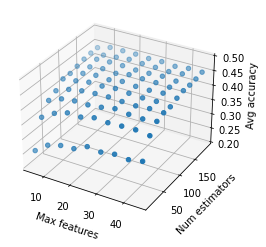

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
fig.clf()
ax = fig.gca(projection='3d')
x = rf_params[:, 0]
y = rf_params[:, 1]
z = rf_params[:, 2]
ax.scatter(x,y,z)
ax.set_zlim(0.2,0.5)
ax.set_xlabel('Max features')
ax.set_ylabel('Num estimators')
ax.set_zlabel('Avg accuracy')
plt.show()

# Summary

* Introduced classification and techniques for evaluation
* Explained decision trees
* :ooked at random forests